In [1]:
import random
import timeit
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Toma una lista ordenada y un elemento, retorn el indice del elemento buscado.
# Retorna -1 si el elemento no se encuentra en la lista.
def binary_search(list,elem):
    
    if(len(list) == 1 and list[0] == elem):
        return 0
    
    if(len(list)==0 or (len(list) == 1 and list[0] != elem)):
        return -1
    
    middle = len(list)//2
    
    if(elem < list[middle]):
        return binary_search(list[:middle],elem)
        
    index=binary_search(list[middle:],elem)
    if index == -1:
        return index
    return index+middle

In [3]:
# Toma una lista ordenada y un elemento, retorn el indice del elemento buscado.
# Retorna -1 si el elemento no se encuentra en la lista.
def ternary_search(list,elem):
    
    #casos base
    
    # lista es vacia, devuelve -1
    # lista tiene un elemento y no es el elemento buscado
    if(len(list) == 0 or (len(list) == 1 and list[0] != elem)):
        return -1
    # lista tiene un elemento y es el elemento buscado
    if(len(list) == 1 and list[0] == elem):
        return 0
    
    #lista tiene dos elementos y el primero es el buscado
    
    if(len(list) == 2 and list[0] == elem):
        return 0
    
    #lista tiene dos elementos y el segundo es el buscado
    if(len(list) == 2 and list[1] == elem):
        return 1

    #lista tiene dos elementos y ninguno es el elemento buscado
    if(len(list) == 2):
        return -1

    #math to divide
    third = len(list)//3
    two_thirds = (len(list)*2)//3 
    
    #------------casos recursivos---------------
    
    #caso esta en la parte izquierda
    if(elem < list[third]):
        return ternary_search(list[:third],elem)
    
    #caso esta en el medio
    if(elem < list[two_thirds]):
        mid_index = ternary_search(list[third:two_thirds],elem)
        if(mid_index == -1):
            return mid_index
        return mid_index + third
            
    #caso esta en la parte derecha
    right_index = ternary_search(list[two_thirds:],elem)
    if(right_index == -1):
        return right_index
    return right_index + two_thirds

In [4]:
n_min = 1
n_max = 1000
st = 10
iteraciones = 100 

t_binary = list()
t_ternary = list()
for n in range(n_min,n_max,st):
    suma_bin = 0
    suma_ter = 0
    for i in range(1,iteraciones):
        v = random.sample(range(1,1000),n) 
        v.sort() 
        elem = random.randrange(n_max) 
        suma_bin += timeit.timeit(lambda: binary_search(v,elem),number=1)
        suma_ter += timeit.timeit(lambda: ternary_search(v,elem),number=1)
    promedio_bin = suma_bin/iteraciones
    t_binary.append(promedio_bin)
    promedio_ter = suma_ter/iteraciones
    t_ternary.append(promedio_ter)

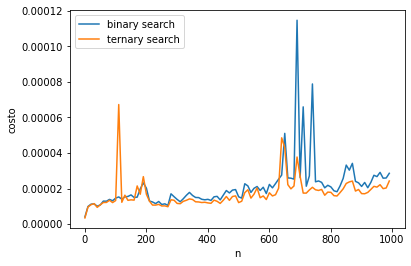

In [5]:
eje_x = list(range(n_min, n_max, st))
plt.plot(eje_x, t_binary, label = 'binary search')
plt.plot(eje_x,t_ternary, label = 'ternary search')
plt.xlabel('n')
plt.ylabel('costo')
plt.legend()